# 1 Camera Calibration

Briefly state how you computed the **camera matrix and distortion coefficients**. Provide an example of a distortion corrected calibration image.

OpenCV functions or other methods were used to calculate the correct camera matrix and distortion coefficients using the calibration chessboard images provided in the repository (note these are **9x6 chessboard images**, unlike the 8x6 images used in the lesson). The distortion matrix should be used to un-distort one of the calibration images provided as a demonstration that the calibration is correct. Example of undistorted calibration image is Included in the writeup (or saved to a folder).

## Functions

**cv2.findChessboardCorners()** and **cv2.drawChessboardCorners()**.

ret, mtx, dist, rvecs, tvecs = **cv2.calibrateCamera**(objpoints, imgpoints, gray.shape[::-1],None,None)

dst = **cv2.undistort**(img, mtx, dist, None, mtx)

### Example of Calibrating Camera

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # convert to grayscale picture

objp = np.zeros((6\*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

ret, corners = cv2.findChessboardCorners(gray, (8,6), None) # find imgpoints

if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
img = cv2.drawChessboardCorners(img, (8,6), corners, ret) # draw imgpoints on image

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

dst = cv2.undistort(img, mtx, dist, None, mtx)

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.lines import Line2D
import os, glob

pipeline_camera_cal = glob.glob(r'camera_cal\*.jpg')[0]
pipeline_thresh_combine = cv2.imread(r'test_images\test1.jpg')
# pipeline_thresh_combine = cv2.imread(r'test_images\straight_lines1.jpg')

%matplotlib qt

objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

objpoints = []
imgpoints = []

camera_cal = os.path.abspath('D:\Github\CarND-Advanced-Lane-Lines\camera_cal')
imglist = glob.glob(camera_cal + '\*.jpg')

for idx, imgname in enumerate(imglist):
    img = mpimg.imread(imgname)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # convert to grayscale picture

    ret, corners = cv2.findChessboardCorners(gray, (9,6), None) # find imgpoints

    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp) # img = cv2.drawChessboardCorners(img, (9,6), corners, ret) # draw imgpoints on image
        img_size = (img.shape[1], img.shape[0])
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
        undist = cv2.undistort(img,mtx,dist,None,mtx)
        cv2.imshow('Undistorted', undist)
        cv2.waitKey(500)

cv2.destroyAllWindows()

# 2 Pipeline (test images)

## 2.1 Provide an example of a distortion-corrected image.

Distortion correction that was calculated via camera calibration has been correctly applied to each image. An example of a distortion corrected image should be included in the writeup (or saved to a folder) and submitted with the project.

In [2]:
# def undistortion5(img_path):
#     objp = np.zeros((5*9,3), np.float32)
#     objp[:,:2] = np.mgrid[0:9,0:5].T.reshape(-1,2)
#     imgpoints_un = []
#     objpoints_un = []
    
#     # img = mpimg.imread(img)
#     origin = cv2.imread(img_path)
#     # out_img = np.zeros_like(img_undist)
#     gray = cv2.cvtColor(origin,cv2.COLOR_RGB2GRAY) # convert to grayscale picture
#     # plt.imshow(gray,cmap='gray')
#     ret, corners = cv2.findChessboardCorners(gray, (9,5), None) # find imgpoints

#     if ret == True:
#         imgpoints_un.append(corners)
#         objpoints_un.append(objp)
#         # print(imgpoints_un)
#         # img = cv2.drawChessboardCorners(img, (9,6), corners, ret) # draw imgpoints on image
#         img_size = (origin.shape[1], origin.shape[0])
#         ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints_un, imgpoints_un, img_size,None,None)
#         out_img = cv2.undistort(origin,mtx,dist,None,mtx)
#         return out_img, mtx, dist
    
def undistortion6(img_path):
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
    imgpoints_un = []
    objpoints_un = []
    
    # img = mpimg.imread(img)
    origin = cv2.imread(img_path)
    # out_img = np.zeros_like(img_undist)
    gray = cv2.cvtColor(origin,cv2.COLOR_RGB2GRAY) # convert to grayscale picture
    # plt.imshow(gray,cmap='gray')
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None) # find imgpoints

    if ret == True:
        imgpoints_un.append(corners)
        objpoints_un.append(objp)
        # print(imgpoints_un)
        # img = cv2.drawChessboardCorners(img, (9,6), corners, ret) # draw imgpoints on image
        img_size = (origin.shape[1], origin.shape[0])
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints_un, imgpoints_un, img_size,None,None)
        out_img = cv2.undistort(origin,mtx,dist,None,mtx)
        return out_img, mtx, dist
    else:
        reject = np.zeros_like(origin)
        cv2.putText(reject, 'Rejected', (int(origin.shape[1]/2) - 250, int(origin.shape[0]/2)), cv2.FONT_HERSHEY_SIMPLEX , 4,(255,255,255),8)
        return reject, 0, 0

True

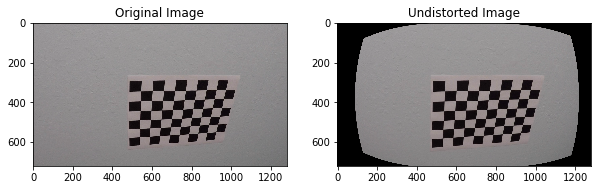

In [3]:
%matplotlib inline
image = glob.glob(r'.\camera_cal\*.jpg')[1]
camera_cal_dir = os.path.abspath(r'.\output_images\distortion-corrected.jpg')

# 给的图片可能会只有5行
def undistortion5and6(image):
    try:
        undist_image, mtx, dist = undistortion5(image)
    except:
        undist_image, mtx, dist = undistortion6(image)
    return undist_image, mtx, dist


f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(cv2.imread(image))
ax1.set_title('Original Image')
undist_image, mtx, dist = undistortion6(image) 
ax2.imshow(undist_image)
ax2.set_title('Undistorted Image')
cv2.imwrite(camera_cal_dir, undist_image)

## 2.2 Describe how you used color transforms, gradients or other methods to create a thresholded binary image. Provide an example of a binary image result.

A method or combination of methods (i.e., color transforms, gradients) has been used to create a binary image containing likely lane pixels. There is no "ground truth" here, just visual verification that the pixels identified as part of the lane lines are, in fact, part of the lines. Example binary images should be included in the writeup (or saved to a folder) and submitted with the project.

### Use sobel gradient, magnatitude and direction thresholds to get  a binary output

In [4]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    if orient == 'x':
        x = 1
        y = 0
    elif orient == 'y':
        x = 0
        y = 1
    sobelxy = cv2.Sobel(gray,cv2.CV_64F,x,y)
    abs_sobelxy = np.absolute(sobelxy)
    scaled_sobel = np.int8(255*abs_sobelxy/np.max(abs_sobelxy))
    sxbinary = np.zeros_like(scaled_sobel)
    thresh_min = thresh[0]
    thresh_max = thresh[1]
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sxbinary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    mag_sobelxy = np.sqrt(np.power(sobelx,2)+np.power(sobely,2))
    scaled_sobelxy = np.uint8(255*mag_sobelxy/np.max(mag_sobelxy))
    thres_min = mag_thresh[0]
    thres_max = mag_thresh[1]
    sbinary = np.zeros_like(scaled_sobelxy)
    sbinary[(scaled_sobelxy >= thres_min) & (scaled_sobelxy <= thres_max)] = 1
    return sbinary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    dir_gradient = np.arctan2(abs_sobely, abs_sobelx)
    binary = np.zeros_like(dir_gradient)
    min = thresh[0]
    max = thresh[1]
    binary[(dir_gradient >=  min) & (dir_gradient <= max)] = 1

    return binary

### Undistort real world image

In [5]:
%matplotlib inline
thresh_im = pipeline_thresh_combine

thresh_image = cv2.undistort(thresh_im,mtx,dist,None,mtx)

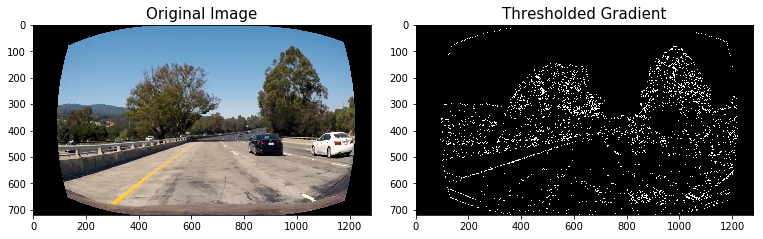

In [6]:
# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(thresh_image, orient='x', sobel_kernel=ksize, thresh=(30, 100))
grady = abs_sobel_thresh(thresh_image, orient='y', sobel_kernel=ksize, thresh=(30, 120))
mag_binary = mag_thresh(thresh_image, sobel_kernel=ksize, mag_thresh=(20, 100))
dir_binary = dir_threshold(thresh_image, sobel_kernel=ksize, thresh=(0.7, 1.3))

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
combined = np.uint8(255 * combined)
cv2.imwrite(os.path.abspath(r'.\output_images\combined.jpg'), combined)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.tight_layout()
ax1.imshow(cv2.cvtColor(thresh_image,cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=15)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=15)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Use sobel_x and s channel to get a binary output (better result)

True

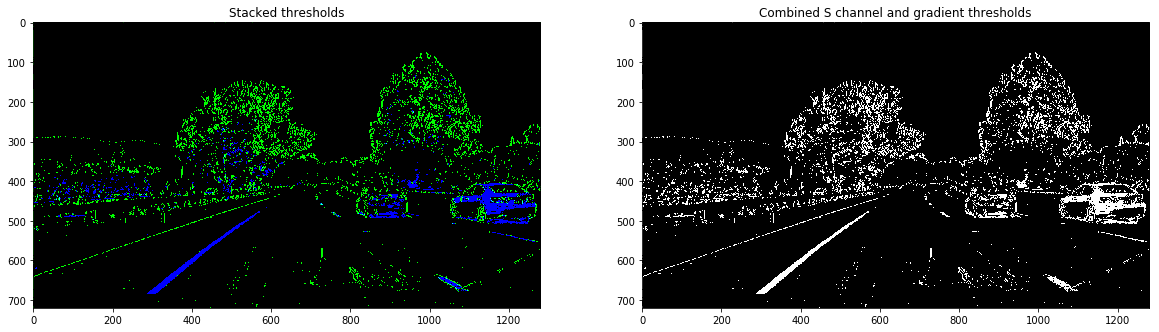

In [7]:
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image

def hls_binary(hls_image):
    # hls_image = pipeline_thresh_combine
    hls = cv2.cvtColor(hls_image, cv2.COLOR_BGR2HLS)
    s_channel = hls[:,:,2]

    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    # Explore gradients in other colors spaces / color channels to see what might work better
    gray = cv2.cvtColor(hls_image, cv2.COLOR_RGB2GRAY)

    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    thresh_min = 25
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Threshold color channel
    s_thresh_min = 170
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))

    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return color_binary, combined_binary

%matplotlib inline
color_binary, combined_binary = hls_binary(pipeline_thresh_combine)
# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
color_binary = np.uint8(255 * color_binary)
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')
combined_binary = np.uint8(255 * combined_binary)
cv2.imwrite(os.path.abspath(r'.\output_images\combined_hls.jpg'), combined_binary)

### thresholding L of Luv for whites and b of Lab for yellows

True

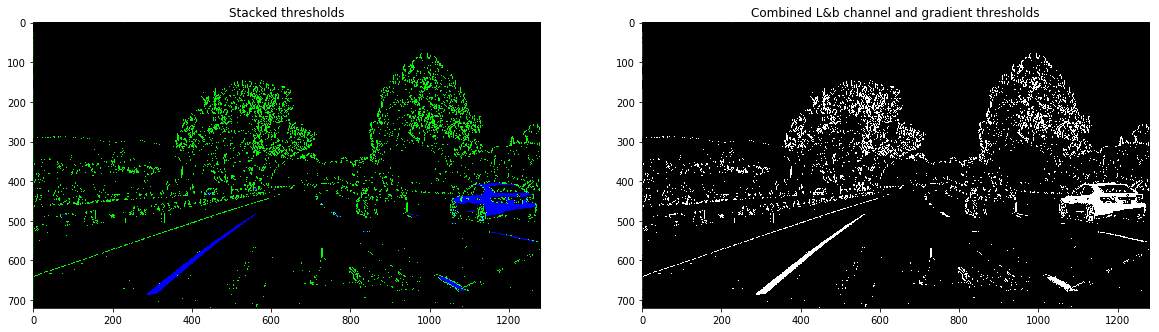

In [8]:
def LuvLab_binary(LuvLab_image):
    # hls_image = pipeline_thresh_combine
    Luv = cv2.cvtColor(LuvLab_image, cv2.COLOR_BGR2Luv)
    Lab = cv2.cvtColor(LuvLab_image, cv2.COLOR_BGR2Lab)
    
    L_channel = Luv[:,:,0]
    b_channel = Lab[:,:,2]

    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    # Explore gradients in other colors spaces / color channels to see what might work better
    gray = cv2.cvtColor(LuvLab_image, cv2.COLOR_BGR2GRAY)

    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    thresh_min = 25
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Threshold color channel
    L_thresh_min = 235
    L_thresh_max = 255
    b_thresh_min = 170
    b_thresh_max = 255
    L_binary = np.zeros_like(L_channel)
    b_binary = np.zeros_like(b_channel)
    all_binary = np.zeros_like(L_channel)
    L_binary[(L_channel >= L_thresh_min) & (L_channel <= L_thresh_max)] = 1
    b_binary[(b_channel >= b_thresh_min) & (b_channel <= b_thresh_max)] = 1
    all_binary[(L_binary == 1) | (b_binary == 1)] = 1
    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, all_binary))

    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(all_binary == 1) | (sxbinary == 1)] = 1
    return color_binary, combined_binary

color_binary, combined_binary = LuvLab_binary(pipeline_thresh_combine)
# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
color_binary = np.uint8(255 * color_binary)
ax1.imshow(color_binary)

ax2.set_title('Combined L&b channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')
combined_binary = np.uint8(255 * combined_binary)
cv2.imwrite(os.path.abspath(r'.\output_images\combined_Lnb.jpg'), combined_binary)

### Lab color space's channel b for yellow

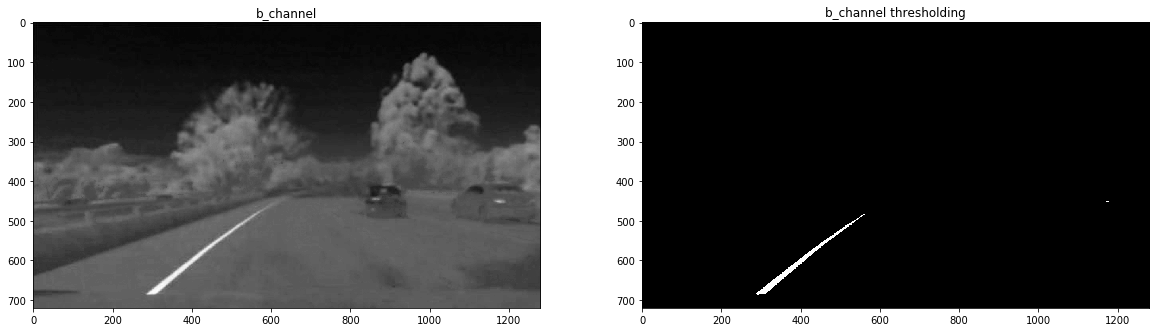

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
b_channel = cv2.cvtColor(pipeline_thresh_combine, cv2.COLOR_BGR2Lab)[:,:,2]
ax1.imshow(b_channel,cmap='gray')
ax1.set_title('b_channel')
thresh = (170,255)
b_binary = np.zeros_like(b_channel)
b_binary[(b_channel > thresh[0]) & (b_channel <= thresh[1])] = 1
ax2.imshow(b_binary,cmap='gray')
ax2.set_title('b_channel thresholding')

### Luv color space's channel L for white

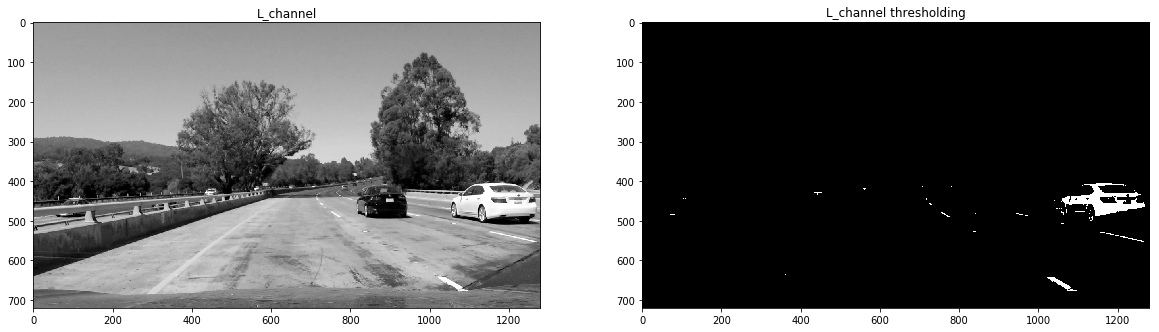

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
L_channel = cv2.cvtColor(pipeline_thresh_combine, cv2.COLOR_BGR2Luv)[:,:,0]
ax1.imshow(L_channel,cmap='gray')
ax1.set_title('L_channel')
thresh = (230,255)
L_binary = np.zeros_like(L_channel)
L_binary[(L_channel > thresh[0]) & (L_channel <= thresh[1])] = 1
ax2.imshow(L_binary,cmap='gray')
ax2.set_title('L_channel thresholding')

## 2.3 Describe how you performed a perspective transform and provide an example of a transformed image.

OpenCV function or other method has been used to correctly rectify each image to a "birds-eye view". Transformed images should be included in the writeup (or saved to a folder) and submitted with the project.

Functions:

M = cv2.getPerspectiveTransform(src, dst)

Minv = cv2.getPerspectiveTrasform(dst, src)

warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

### Illastrate perspective transformation

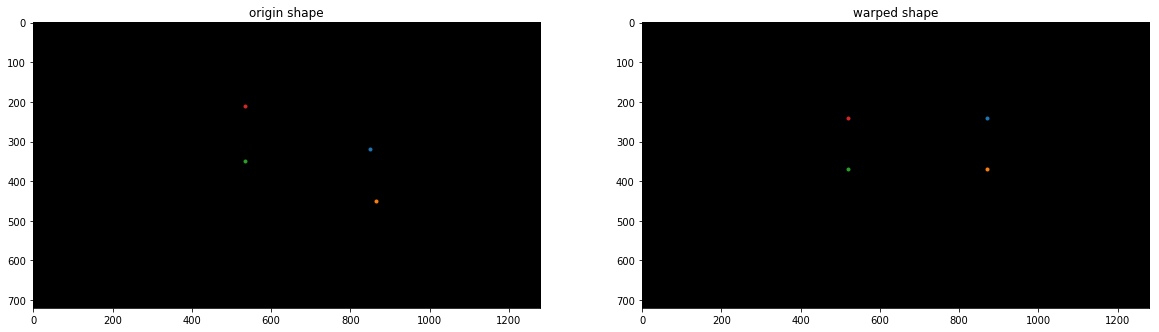

In [11]:
im = np.zeros_like(pipeline_thresh_combine)
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(im, cmap='gray')
ax1.plot(850,320,'.')
ax1.plot(865,450,'.')
ax1.plot(533,350,'.')
ax1.plot(535,210,'.')
ax1.set_title('origin shape')
ax2.imshow(im, cmap='gray')
ax2.plot(870,240,'.')
ax2.plot(870,370,'.')
ax2.plot(520,370,'.')
ax2.plot(520,240,'.')
ax2.set_title('warped shape')

True

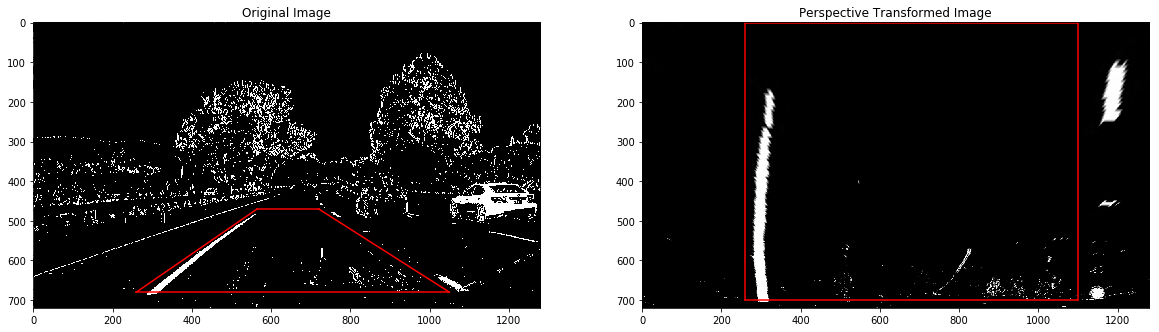

In [12]:
pers_orig = cv2.imread(r'.\output_images\combined_Lnb.jpg')
# pers_orig = cv2.imread(r'test_images\test3.jpg')
def warp(img):
    img_size = (img.shape[1], img.shape[0])
    src = np.float32(
            [[720,470], # top right
             [1050,680], # bottom right
             [260,680], # bottom left
             [565,470]]) # top left
   
    dst = np.float32(
            [[1100,0],
             [1100,700],
             [260,700],
             [260,0]])
    '''
    src = np.float32(
        [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
        [((img_size[0] / 6) - 10), img_size[1]],
        [(img_size[0] * 5 / 6) + 60, img_size[1]],
        [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
    
    dst = np.float32(
        [[(img_size[0] / 4), 10],
        [(img_size[0] / 4), img_size[1] - 10],
        [(img_size[0] * 3 / 4), img_size[1] - 10],
        [(img_size[0] * 3 / 4), 10]])
    '''
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, src, dst, M, Minv

pers_warped, src_w, dst_w, M_w, Minv_w = warp(pers_orig)

%matplotlib inline

f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(cv2.cvtColor(pers_orig,cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax2.imshow(pers_warped,cmap='gray')
ax2.set_title('Perspective Transformed Image')
for i in range(4):
    if i != 3:
        line_x1 = (src_w[i][0], src_w[i+1][0])
        line_y1 = (src_w[i][1], src_w[i+1][1])
        line_x2 = (dst_w[i][0], dst_w[i+1][0])
        line_y2 = (dst_w[i][1], dst_w[i+1][1])
    elif i == 3:
        line_x1 = (src_w[i][0], src_w[0][0])
        line_y1 = (src_w[i][1], src_w[0][1])
        line_x2 = (dst_w[i][0], dst_w[0][0])
        line_y2 = (dst_w[i][1], dst_w[0][1])

    ax1.plot(line_x1, line_y1, color = 'red')
    ax2.plot(line_x2, line_y2, color = 'red')

cv2.imwrite(r'.\output_images\perspective_trans.jpg', pers_warped)

## 2.4 Describe how you identified lane-line pixels and fit their positions with a polynomial?

Methods have been used to identify lane line pixels in the rectified binary image. The left and right line have been identified and fit with a curved functional form (e.g., spine or polynomial). Example images with line pixels identified and a fit overplotted should be included in the writeup (or saved to a folder) and submitted with the project.

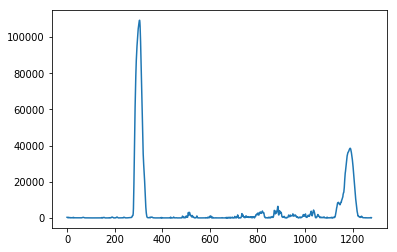

In [13]:
fit_image = cv2.imread(r'.\output_images\perspective_trans.jpg')
fit_image = cv2.cvtColor(fit_image, cv2.COLOR_BGR2GRAY)

histogram = np.sum(fit_image,axis=0)
plt.plot(histogram)

### Find and fit left and right Lanes

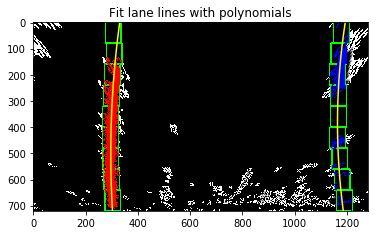

In [14]:
def lanes_finding(image, margin=30):
    # fit_image = cv2.imread(r'.\output_images\perspective_trans.jpg')
    if image.ndim == 2:
        fit_image = image
    else:
        fit_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    histogram = np.sum(fit_image,axis=0)

    # fit_image = cv2.imread(r'.\output_images\perspective_trans.jpg') # 读入更改视角的图片
    # fit_image = cv2.cvtColor(fit_image, cv2.COLOR_BGR2GRAY) # 改为单通道
    out_img = np.dstack((fit_image,fit_image,fit_image))*255

    midpoint = np.int(histogram.shape[0]/2) # shape[0] 是 y 轴
    leftx_base = np.argmax(histogram[:midpoint]) # 左边的峰值
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint # 右边的峰值

    nwindows = 9
    window_height = np.int(fit_image.shape[0]/nwindows)

    nonzero = fit_image.nonzero() # 所有非零点的坐标
    nonzeroy = np.array(nonzero[0]) 
    nonzerox = np.array(nonzero[1])

    leftx_current = leftx_base # 开始搜索的点
    rightx_current = rightx_base

    # margin = 100
    minpix = 40

    left_lane_inds = [] # 逻辑值数组
    right_lane_inds = []

    for window in range(nwindows): # window = 0 - 8
        win_y_low = fit_image.shape[0] - (window+1)*window_height 
        win_y_high = fit_image.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 4) # 左边的方框
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 4) # 右边的方框
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                          (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0] # 左边方框中点的个数
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                           (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0] # 右边方框中点的个数

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position 找到了合适的位置
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds])) # 新的搜索点，下一个方框 X 方向的中心
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    left_lane_inds = np.concatenate(left_lane_inds) # 拉直
    right_lane_inds = np.concatenate(right_lane_inds)

    leftx = nonzerox[left_lane_inds] # 左边点的 x 坐标
    lefty = nonzeroy[left_lane_inds] # 左边点的 y 坐标
    rightx = nonzerox[right_lane_inds] # 右
    righty = nonzeroy[right_lane_inds] 

    left_fit = np.polyfit(lefty, leftx, 2) # y 的 2 次多项式
    right_fit = np.polyfit(righty, rightx, 2)

    ploty = np.linspace(0, fit_image.shape[0]-1, fit_image.shape[0]) # y 坐标
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2] # x 左边的曲线坐标
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2] # x 右边的曲线坐标

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0] # 左边在方框中的点涂红
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255] # 蓝
    return out_img, left_lane_inds, right_lane_inds, nonzerox, nonzeroy, midpoint, leftx_base, rightx_base, leftx, rightx, lefty, righty, left_fitx, right_fitx, ploty, left_fit, right_fit

out_img, left_lane_inds, right_lane_inds, nonzerox, nonzeroy, midpoint, leftx_base, rightx_base, leftx, rightx, lefty, righty, left_fitx, right_fitx, ploty, left_fit, right_fit = lanes_finding(cv2.imread(r'.\output_images\perspective_trans.jpg'))

plt.imshow(out_img)
plt.title('Fit lane lines with polynomials')
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
# plt.xlim(0, 1280)
# plt.ylim(720, 0)

### Measuring Curvature of Each Lane

In [15]:
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

3702.04544952 2587.06546852


In [16]:
# Define conversions in x and y from pixels space to meters
def curvature(lefty = lefty, leftx = leftx, righty = righty, rightx = rightx, ploty = ploty):
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    return left_curverad, right_curverad

left_curverad, right_curverad = curvature()
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

1209.67720853 m 828.235386677 m


### Create an image to draw on and an image to show the selection window

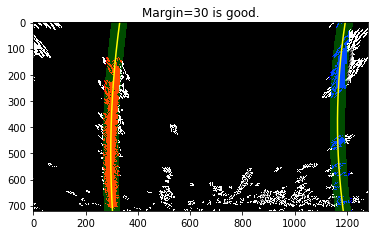

In [17]:
# This is a simple way to stack 2D arrays (images) into a single 3D array for processing.
margin = 30
out_img = np.dstack((fit_image, fit_image, fit_image))*255 
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
# 左边
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))]) 
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
# 每一行是 带状Lane 两端点 （同一个 y 值）
left_line_pts = np.hstack((left_line_window1, left_line_window2)) # = np.concatenate(array, axis=0)
# 右边
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0)) # Lanes
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.title('Margin=30 is good.')
plt.plot(left_fitx, ploty, color='yellow') # Lines
plt.plot(right_fitx, ploty, color='yellow')
# plt.xlim(0, 1280)
# plt.ylim(720, 0)

## 2.5 Describe how you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.

Here the idea is to take the measurements of where the lane lines are and estimate how much the road is curving and where the vehicle is located with respect to the center of the lane. The radius of curvature may be given in meters assuming the curve of the road follows a circle. For the position of the vehicle, you may assume the camera is mounted at the center of the car and the deviation of the midpoint of the lane from the center of the image is the offset you're looking for. As with the polynomial fitting, convert from pixels to meters.

#### Generate some fake data to represent lane-line pixels

ploty = np.linspace(0, 719, num=720)# to cover same y-range as image

quadratic_coeff = 3e-4 # arbitrary quadratic coefficient

#### For each y position generate random x position within +/-50 pix of the line base position in each case (x=200 for left, and x=900 for right)

leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])

rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y

rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


#### Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)

left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]

right_fit = np.polyfit(ploty, rightx, 2)

right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


#### Plot up the fake data
mark_size = 3

plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)

plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)

plt.xlim(0, 1280)

plt.ylim(0, 720)

plt.plot(left_fitx, ploty, color='green', linewidth=3)

plt.plot(right_fitx, ploty, color='green', linewidth=3)

plt.gca().invert_yaxis() # to visualize as we do the images

#### Define y-value where we want radius of curvature
#### I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)

left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])

right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])

print(left_curverad, right_curverad) #### Example values: 1926.74 1908.48

#### Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension

xm_per_pix = 3.7/700 # meters per pixel in x dimension

#### Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)

right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)

#### Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])

right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

#### Now our radius of curvature is in meters

print(left_curverad, 'm', right_curverad, 'm') # Example values: 632.1 m    626.2 m

## 2.6 Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.

The fit from the rectified image has been warped back onto the original image and plotted to identify the lane boundaries. This should demonstrate that the lane boundaries were correctly identified. An example image with lanes, curvature, and position from center should be included in the writeup (or saved to a folder) and submitted with the project.

True

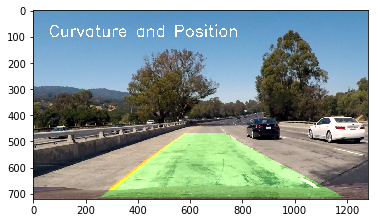

In [18]:
# Create an image to draw the lines on
def project_back(origin_image,lane_warped = pers_warped, Minv = Minv_w, left = left_fitx, right = right_fitx, y = ploty):
    if lane_warped.ndim == 3:
        lane_warped = cv2.cvtColor(lane_warped, cv2.COLOR_RGB2GRAY)
    warp_zero = np.zeros_like(lane_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    # color_warp = warp_zero
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left, y]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right, y])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (origin_image.shape[1], origin_image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(origin_image, 1, newwarp, 0.3, 0)
    return result

project_image = project_back(pipeline_thresh_combine)

cv2.putText(project_image, 'Curvature and Position',(60,100), cv2.FONT_HERSHEY_SIMPLEX , 2,(255,255,255),4)
plt.imshow(cv2.cvtColor(project_image,cv2.COLOR_BGR2RGB))
cv2.imwrite(r'output_images/project_back.jpg', project_image)

## 2.7 New Lane Finding

### Sanity Check
Ok, so your algorithm found some lines. Before moving on, you should check that the detection makes sense. To confirm that your detected lane lines are real, you might consider:

- Checking that they have similar curvature
- Checking that they are separated by approximately the right distance horizontally
- Checking that they are roughly parallel

### Look-Ahead Filter

if you fit a polynomial, then for each y position, you have an x position that represents the lane center from the last frame. Search for the new line within +/- some margin around the old line center.

### Reset and Smoothing

If your sanity checks reveal that the lane lines you've detected are problematic for some reason, you can simply assume it was a bad or difficult frame of video, retain the previous positions from the frame prior and step to the next frame to search again. 

If you lose the lines for several frames in a row, you should probably start searching from scratch using a histogram and sliding window, or another method, to re-establish your measurement.

Even when everything is working, your line detections will jump around from frame to frame a bit and it can be preferable to smooth over the last n frames of video to obtain a cleaner result. Each time you get a new high-confidence measurement, you can append it to the list of recent measurements and then take an average over n past measurements to obtain the lane position you want to draw onto the image.

In [19]:
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.bias = None
        #base point
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

In [20]:
def new_lanes_finding(image, margin=30):
    # fit_image = cv2.imread(r'.\output_images\perspective_trans.jpg')
    if image.ndim == 2:
        fit_image = image
    else:
        fit_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    histogram = np.sum(fit_image,axis=0)

    # fit_image = cv2.imread(r'.\output_images\perspective_trans.jpg') # 读入更改视角的图片
    # fit_image = cv2.cvtColor(fit_image, cv2.COLOR_BGR2GRAY) # 改为单通道
    out_img = np.dstack((fit_image,fit_image,fit_image))*255

    midpoint = np.int(histogram.shape[0]/2) # shape[0] 是 y 轴
    leftx_base = np.argmax(histogram[:midpoint]) # 左边的峰值
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint # 右边的峰值

    nwindows = 9
    window_height = np.int(fit_image.shape[0]/nwindows)

    nonzero = fit_image.nonzero() # 所有非零点的坐标
    nonzeroy = np.array(nonzero[0]) 
    nonzerox = np.array(nonzero[1])

    leftx_current = leftx_base # 开始搜索的点
    rightx_current = rightx_base

    # margin = 100
    minpix = 40

    left_lane_inds = [] # 逻辑值数组
    right_lane_inds = []

    for window in range(nwindows): # window = 0 - 8
        win_y_low = fit_image.shape[0] - (window+1)*window_height 
        win_y_high = fit_image.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 4) # 左边的方框
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 4) # 右边的方框
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                          (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0] # 左边方框中点的个数
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                           (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0] # 右边方框中点的个数

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position 找到了合适的位置
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds])) # 新的搜索点，下一个方框 X 方向的中心
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    left_lane_inds = np.concatenate(left_lane_inds) # 拉直
    right_lane_inds = np.concatenate(right_lane_inds)

    leftx = nonzerox[left_lane_inds] # 左边点的 x 坐标
    lefty = nonzeroy[left_lane_inds] # 左边点的 y 坐标
    rightx = nonzerox[right_lane_inds] # 右
    righty = nonzeroy[right_lane_inds] 

    left_fit = np.polyfit(lefty, leftx, 2) # y 的 2 次多项式
    right_fit = np.polyfit(righty, rightx, 2)

    ploty = np.linspace(0, fit_image.shape[0]-1, fit_image.shape[0]) # y 坐标
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2] # x 左边的曲线坐标
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2] # x 右边的曲线坐标

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0] # 左边在方框中的点涂红
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255] # 蓝
    
    left_lane = Line()
    right_lane = Line()
    
    left_lane.detected = True
    left_lane.recent_xfitted.append(left_fitx) # after fit
    left_lane.current_fit = left_fit # coefficients
    left_lane.bias = (midpoint - leftx_base) * 3.7/700 
    left_lane.line_base_pos = leftx_base
    left_lane.allx = leftx # pixels
    left_lane.ally = lefty
    
    right_lane.detected = True
    right_lane.recent_xfitted.append(right_fitx)
    right_lane.current_fit = right_fit
    right_lane.bias = (midpoint - rightx_base) * 3.7/700 
    right_lane.line_base_pos = rightx_base
    right_lane.allx = rightx
    right_lane.ally = righty
    
    return out_img, left_lane, right_lane



# 3 Pipeline (video)

In [27]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

def process_image(image): 
    color_binary, combined_binary = LuvLab_binary(image)
    warped, src, dst, M, Minv = warp(combined_binary)
    histogram = np.sum(warped,axis=0)
    midpoint = np.int(histogram.shape[0]/2) # shape[0] 是 y 轴
    ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0]) # y 坐标
    out_img, left_lane, right_lane = new_lanes_finding(warped, margin=30)
    left_curverad, right_curverad = curvature(lefty=left_lane.ally, leftx=left_lane.allx, 
                  righty=right_lane.ally, rightx=right_lane.allx, ploty=ploty)
    
    left_lane.radius_of_curvature = left_curverad
    right_lane.radius_of_curvature = right_curverad
    
    result = project_back(image, lane_warped=warped, Minv=Minv, 
                          left=left_lane.recent_xfitted[-1], right=right_lane.recent_xfitted[-1], y=ploty)
    bias = ((left_lane.line_base_pos +  right_lane.line_base_pos) / 2 - midpoint) * 3.7/700
    rad = (left_curverad + right_curverad)/2
    cv2.putText(result, 'Curvature {:>8.2f}m'.format(rad),(60,100), cv2.FONT_HERSHEY_SIMPLEX , 1,(255,255,255),4)
    cv2.putText(result, 'Position {:<+5.2f}m'.format(bias),(100,150), cv2.FONT_HERSHEY_SIMPLEX , 1,(255,255,255),4)
    
    return result


In [28]:
white_output = r'.\output_images\project_video_1.mp4'

clip1 = VideoFileClip(r'.\Videos\project_video.mp4').subclip(0,1)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video .\output_images\project_video_1.mp4
[MoviePy] Writing video .\output_images\project_video_1.mp4


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 25/26 [00:03<00:00,  9.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: .\output_images\project_video_1.mp4 

Wall time: 4.01 s


In [29]:
HTML("""
<video width="480" height="270" controls>
  <source src="{0}">
</video>
""".format(white_output))